In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
df.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [3]:
df.drop(columns = ['id','CustomerId','Surname'],inplace=True)
test.drop(columns = ['id','CustomerId','Surname'],inplace=True)


In [4]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0


In [5]:
test.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,France,Female,23.0,2,0.0,2,0.0,1.0,160976.75
1,683,France,Female,46.0,2,0.0,1,1.0,0.0,72549.27


In [6]:
df['Geography'].value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [7]:
test['Geography'].value_counts()

Geography
France     63171
Spain      23913
Germany    22939
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      93150
Female    71884
Name: count, dtype: int64

In [9]:
df['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from imblearn.over_sampling import SMOTE

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
le= LabelEncoder()
cat_col = ['Geography','Gender']
for i in cat_col:
    df[i] =le.fit_transform(df[i])

In [12]:
cat_col = ['Geography','Gender']
for i in cat_col:
    test[i] =le.fit_transform(test[i])

In [13]:
X=df.drop(['Exited'],axis = 1)
y=df['Exited']

In [14]:
smote = SMOTE()

In [15]:
X,y =smote.fit_resample(X,y)

In [16]:
y.value_counts()

Exited
0    130113
1    130113
Name: count, dtype: int64

In [17]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,0,1,33.000000,3,0.000000,2,1.000000,0.000000,181449.970000
1,627,0,1,33.000000,1,0.000000,2,1.000000,1.000000,49503.500000
2,678,0,1,40.000000,10,0.000000,2,1.000000,0.000000,184866.690000
3,581,0,1,34.000000,2,148882.540000,1,1.000000,1.000000,84560.880000
4,716,2,1,33.000000,5,0.000000,2,1.000000,1.000000,15068.830000
...,...,...,...,...,...,...,...,...,...,...
260221,696,1,0,49.065392,3,164605.542548,1,1.000000,0.000000,141179.664003
260222,637,0,0,32.614131,7,106062.346468,1,0.809783,0.000000,187973.571465
260223,608,1,0,44.424732,6,117105.839660,1,0.639273,0.360727,183774.001111
260224,672,1,0,53.402062,3,0.000000,1,1.000000,0.000000,49671.967763


In [18]:
y

0         0
1         0
2         0
3         0
4         0
         ..
260221    1
260222    1
260223    1
260224    1
260225    1
Name: Exited, Length: 260226, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 12)

In [20]:
X_train.shape,X_test.shape

((208180, 10), (52046, 10))

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train,X_test

(array([[-0.21790746,  0.53791507,  1.16158951, ...,  0.61963798,
          1.23198406, -1.1571963 ],
        [ 0.17495162,  0.53791507,  1.16158951, ...,  0.61963798,
          1.23198406, -0.2082286 ],
        [ 0.82971677, -0.8084733 ,  1.16158951, ..., -1.83980112,
         -0.90279712,  0.95453858],
        ...,
        [-0.65005246,  1.88430344,  1.16158951, ..., -1.83980112,
          1.23198406, -0.24596396],
        [ 1.07852753, -0.8084733 , -0.86088932, ...,  0.61963798,
          1.08505027,  0.89674564],
        [ 1.24876647,  0.53791507, -0.86088932, ...,  0.61963798,
         -0.90279712,  0.25045372]]),
 array([[ 0.98686041, -0.8084733 , -0.86088932, ..., -0.91406615,
         -0.90279712,  0.80022803],
        [-0.76791019, -0.8084733 , -0.86088932, ...,  0.61963798,
         -0.90279712, -0.23479795],
        [ 1.27495707, -0.8084733 , -0.86088932, ..., -0.33045496,
         -0.07812107,  0.04207449],
        ...,
        [ 0.30590465,  1.88430344,  1.16158951, ..., -

In [23]:
import tensorflow
from tensorflow.keras import layers,Sequential  
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
model = Sequential()
model.add(Dense(32,activation='relu',input_dim =10))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2529 (9.88 KB)
Trainable params: 2529 (9.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
history = model.fit(X_train,y_train,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
5205/5205 [==============================] - 19s 3ms/step - loss: 0.3568 - accuracy: 0.8439 - val_loss: 0.3210 - val_accuracy: 0.8592
Epoch 2/50
5205/5205 [==============================] - 17s 3ms/step - loss: 0.3136 - accuracy: 0.8655 - val_loss: 0.3041 - val_accuracy: 0.8694
Epoch 3/50
5205/5205 [==============================] - 17s 3ms/step - loss: 0.3048 - accuracy: 0.8686 - val_loss: 0.3089 - val_accuracy: 0.8632
Epoch 4/50
5205/5205 [==============================] - 17s 3ms/step - loss: 0.3006 - accuracy: 0.8699 - val_loss: 0.2947 - val_accuracy: 0.8722
Epoch 5/50
5205/5205 [==============================] - 17s 3ms/step - loss: 0.2985 - accuracy: 0.8701 - val_loss: 0.2916 - val_accuracy: 0.8740
Epoch 6/50
5205/5205 [==============================] - 17s 3ms/step - loss: 0.2971 - accuracy: 0.8716 - val_loss: 0.2916 - val_accuracy: 0.8741
Epoch 7/50
5205/5205 [==============================] - 17s 3ms/step - loss: 0.2956 - accuracy: 0.8720 - val_loss: 0.2891 - val_ac

In [28]:
model.evaluate(X_test,y_test)

1627/1627 [==============================] - 3s 2ms/step - loss: 0.2758 - accuracy: 0.8786


[0.2757517397403717, 0.8785689473152161]

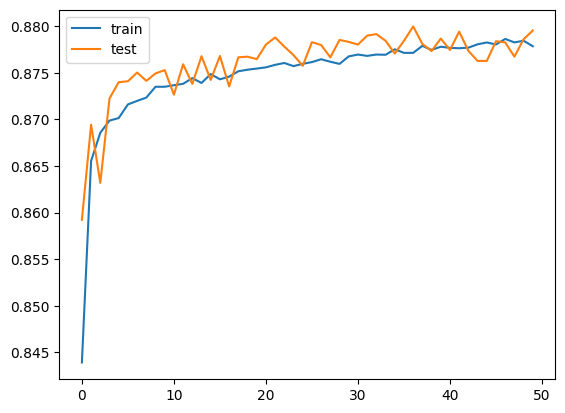

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label = 'train')
plt.plot(history.history['val_accuracy'],label = 'test')
plt.legend()
plt.show()

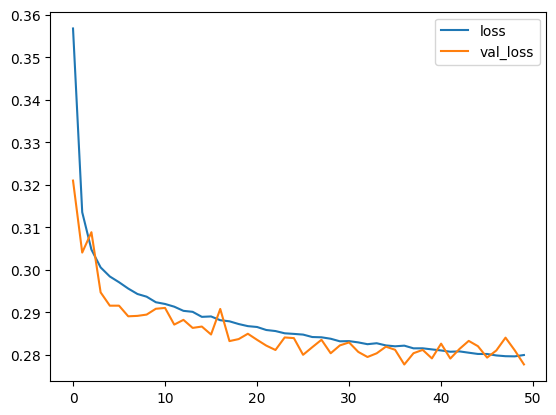

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()

In [36]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred>0.5,1,0)
y_pred

1627/1627 [==============================] - 2s 1ms/step


array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [39]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8808361833762441
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     26018
           1       0.89      0.86      0.88     26028

    accuracy                           0.88     52046
   macro avg       0.88      0.88      0.88     52046
weighted avg       0.88      0.88      0.88     52046



In [45]:
test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...
110018,570,2,1,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,575,0,0,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,712,0,1,31.0,2,0.00,2,1.0,0.0,16287.38
110021,709,0,0,32.0,3,0.00,1,1.0,1.0,158816.58


In [47]:
result = model.predict(scaler.transform(test))
result

3439/3439 [==============================] - 5s 1ms/step


array([[0.01422768],
       [0.97344196],
       [0.03563645],
       ...,
       [0.02129651],
       [0.27829644],
       [0.6558359 ]], dtype=float32)

In [52]:
test_df = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
test_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [61]:
np.round(result,1)

array([[0. ],
       [1. ],
       [0. ],
       ...,
       [0. ],
       [0.3],
       [0.7]], dtype=float32)

In [53]:
submission=pd.DataFrame(columns=['id','Exited'])
submission['id'] = test_df['id']

submission['Exited']=np.round(result,1)

In [54]:
submission

,id,Exited
0,165034,0.0
1,165035,1.0
2,165036,0.0
3,165037,0.3
4,165038,0.4
...,...,...
110018,275052,0.0
110019,275053,0.2
110020,275054,0.0
110021,275055,0.3


In [56]:
submission.nunique()

id        110023
Exited        11
dtype: int64

In [62]:
submission.to_csv('submission.csv',index=False)